In [1]:
# absolute and relative differences of stations due to changing amount of endnodes
# baseline is 4 stations across the border
### import packages ###
import numpy as np
import pandas as pd
path='/nobackup/users/out/Magnetic_field/new_Halloween'
#######################
#what are the Dutch stations
A=np.arange(3,21)

B=np.arange(46,54,1)
stationlist=np.hstack([0,1,A,28,29,32,33,35,43,44,B])

B=np.arange(41,49,1)
stationlist_more_reduced=np.hstack([0,1,A,25,26,29,30,32,39,40,B])

B=np.arange(34,42,1)
stationlist_very_reduced=np.hstack([0,1,A,23,24,27,28,30,32,33,B])

#create matrices
normal_np=np.zeros((1440*3,len(stationlist)))
extended_np=np.zeros((1440*3,len(stationlist)))
reduced_np=np.zeros((1440*3,len(stationlist)))
more_reduced_np=np.zeros((1440*3,len(stationlist)))
very_reduced_np=np.zeros((1440*3,len(stationlist)))

#read-in
for time in range(1440*3):
    Atime=pd.read_csv(f'{path}/normal_powergrid/GIC/GIC_{str(time).zfill(4)}.csv',delimiter=';')
    Atime=Atime.iloc[stationlist,:]
    normal_np[time,:]=Atime.to_numpy()[:,2]
    
    Atime=pd.read_csv(f'{path}/extended_powergrid/GIC/GIC_{str(time).zfill(4)}.csv',delimiter=';')
    Atime=Atime.iloc[stationlist,:]
    extended_np[time,:]=Atime.to_numpy()[:,2]
    
    Atime=pd.read_csv(f'{path}/reduced_powergrid/GIC/GIC_{str(time).zfill(4)}.csv',delimiter=';')
    Atime=Atime.iloc[stationlist,:]
    reduced_np[time,:]=Atime.to_numpy()[:,2]
    
    Atime=pd.read_csv(f'{path}/very_reduced_powergrid/GIC/GIC_{str(time).zfill(4)}.csv',delimiter=';')
    Atime=Atime.iloc[stationlist_very_reduced,:]
    very_reduced_np[time,:]=Atime.to_numpy()[:,2]
    
    Atime=pd.read_csv(f'{path}/more_reduced_powergrid/GIC/GIC_{str(time).zfill(4)}.csv',delimiter=';')
    Atime=Atime.iloc[stationlist_more_reduced,:]
    more_reduced_np[time,:]=Atime.to_numpy()[:,2]

In [2]:
diffext=np.zeros((1440*3,len(stationlist)))
diffred=np.zeros((1440*3,len(stationlist)))
diffmred=np.zeros((1440*3,len(stationlist)))
diffvred=np.zeros((1440*3,len(stationlist)))
diffext=abs(np.subtract(extended_np,normal_np))
diffred=abs(np.subtract(reduced_np,normal_np))
diffmred=abs(np.subtract(more_reduced_np,normal_np))
diffvred=abs(np.subtract(very_reduced_np,normal_np))

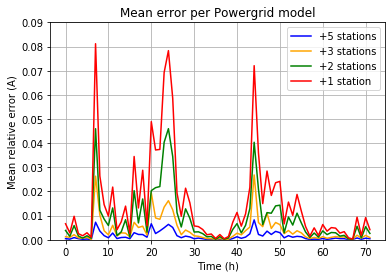

In [16]:
import matplotlib.pyplot as plt
names=pd.read_csv('/usr/people/out/Documents/380+220kV_extended/spreadsheettrafo.csv', delimiter=';')
names=names.loc[stationlist,'naam']
stationnames=names.to_numpy()

%matplotlib inline
timevector=np.linspace(0,72,1440*3)
fig=plt.figure()
ax1=fig.add_subplot()
# ax2=fig.add_subplot(222)
# ax3=fig.add_subplot(223)
# ax4=fig.add_subplot(224)
# fig.set_xlabel('Time (h)')
# fig.set_ylabel('Relative difference')
ax1.set_title('Mean error per Powergrid model')
ax1.set_ylabel('Mean relative error (A)')
ax1.set_xlabel('Time (h)')
# ax2.set_title('Relative difference reduced (+3) grid')
# ax3.set_title('Relative difference more reduced (+2) grid')
# ax4.set_title('Relative difference very reduced (+1) grid')
ax1.errorbar(timevector[::60], np.mean(diffext[::60,:], axis=1), color='blue', label='+5 stations')
ax1.errorbar(timevector[::60], np.mean(diffred[::60,:], axis=1), color='orange', label='+3 stations')
ax1.errorbar(timevector[::60], np.mean(diffmred[::60,:], axis=1), color='green', label='+2 stations')
ax1.errorbar(timevector[::60], np.mean(diffvred[::60,:], axis=1), color='red', label='+1 station')
# ax1.plot(timevector, np.mean(normal_np, axis=1), color='black')
# ax2.plot(timevector, diffred[:,station])
# ax3.plot(timevector, diffmred[:,station])
# ax4.plot(timevector, diffvred[:,station])
ax1.set_ylim(0,0.09)
ax1.grid()
plt.legend()
# plt.plot()
plt.savefig(f'/nobackup/users/out/Magnetic_field/new_Halloween/errorpowergrid.png', bbox_inches = 'tight')
# print(np.where(diffext[:,0]==max(diffext[:,0])))